# Análise Exploratória - Dados de Reclamações

Resolva os exercícios propostos abaixo.

## Leitura e análise inicial dos dados

Abra o arquivo `../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv` que você criou no exercício de Limpeza de Dados e faça as análises e exibições iniciais do conteúdo.

Responda: Qual a média das idades das pessoas que reclamaram? Qual a idade máxima? Quantos valores únicos possuímos para a coluna `BAIRRO_ASS`?

**Dica:** A função len() pode ser usada para se obter o tamanho de listas, séries ou dataframes. Por exemplo, `len([1,3,9])` retorna 3.

In [2]:
# Resposta:
import pandas as pd
data = pd.read_csv('../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv')
dataSujo = pd.read_csv('../data/2017-02-01_156_-_Base_de_Dados_sample.csv',sep=';',encoding='latin-1')

print('Média das idades das pessoas que reclamam: ' + str((data['IDADE'].sum())/len(data)))
print('Idade máxima: ' + str(data['IDADE'].max()))
print('Bairros Únicos: ')
data['BAIRRO_ASS'].unique()


Média das idades das pessoas que reclamam: 48.033691548068546
Idade máxima: 96
Bairros Únicos: 


array(['centro', 'sao francisco', 'reboucas', 'jardim botanico',
       'alto da rua xv', 'atuba', 'capao da imbuia', 'merces',
       'abranches', 'santa felicidade', 'santa quiteria', 'parolin',
       'lindoia', 'novo mundo', 'guaira', 'umbara', 'alto boqueirao',
       'cidade industrial', 'campo de santana', 'bigorrilho', 'batel',
       'agua verde', 'juveve', 'alto da gloria', 'bairro alto', 'portao',
       'bacacheri', 'cabral', 'campina do siqueira', 'santa candida',
       'taruma', 'centro civico', 'ahu', 'cristo rei', 'sao lourenco',
       'boa vista', 'santo inacio', 'hugo lange', 'barreirinha',
       'uberaba', 'mossungue', 'tingui', 'taboao', 'seminario',
       'pinheirinho', 'cajuru', 'capao raso', 'guabirotuba',
       'jardim das americas', 'prado velho', 'boqueirao',
       'campo comprido', 'sitio cercado', 'pilarzinho', 'fazendinha',
       'vista alegre', 'jardim social', 'caximba', 'hauer', 'vila izabel',
       'bom retiro', 'cascatinha', 'sao braz', 'cachoe

O primeiro passo ao se analisar dados desconhecidos é visualizar algumas linhas de dados:

In [3]:
# Resposta:
data.head()

,Unnamed: 0,DATA,HORARIO,SUBDIVISAO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,HORA,IDADE
0,4,2016-09-12,01:28:16,DORMINDO/CAÍDAS NA RUA,centro,M,1997-04-06,A pessoa da solicitação já faz parte da rede d...,1,19
1,5,2016-12-11,02:29:24,DORMINDO/CAÍDAS NA RUA,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,2,45
2,7,2017-11-01,12:11:12,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,1957-04-08,Alendronato de sódio 70 mg e Carbonato de cálc...,12,60
3,8,2016-12-14,10:19:29,RECURSOS MATERIAIS - MEDICAMENTOS,sao francisco,F,1938-08-18,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...,10,78
4,9,2016-06-12,19:01:01,DORMINDO/CAÍDAS NA RUA,centro,M,1980-02-13,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",19,36


## Visualização da distribuição das variáveis

Exiba histogramas para visualizar a distribuição de idades para homens e mulheres.

Responda: Existe alguma diferença na distribuição das idades entre homens e mulheres?

<AxesSubplot:>

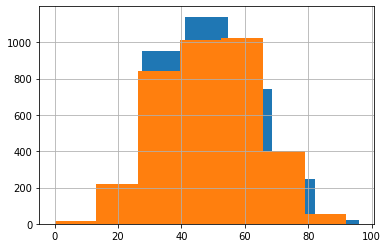

In [4]:
# Resposta:
data_h = data[data['SEXO']=='M']
data_h["IDADE"].hist(bins=7)

# Resposta:
data_h = data[data['SEXO']=='F']
data_h["IDADE"].hist(bins=7)

array([<AxesSubplot:title={'center':'F'}>,
       <AxesSubplot:title={'center':'M'}>], dtype=object)

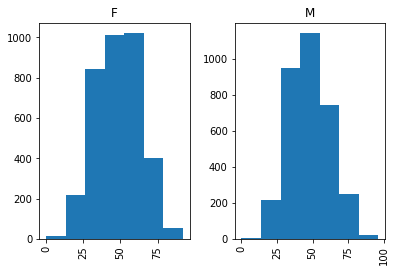

In [5]:
#OUTRA RESPOSTA
# Resposta:
data["IDADE"].hist(bins=7,by=data['SEXO'])

Exiba um BoxPlot das idades de acordo com o sexo do reclamante para ver se as diferenças ficam mais óbvias. 

**Dica:** Para exibir boxplots agrupados por categoria, use o método `boxplot` como no exemplo: `df.boxplot(column='IDADE', by = 'SEXO')`.

<AxesSubplot:title={'center':'IDADE'}, xlabel='SEXO'>

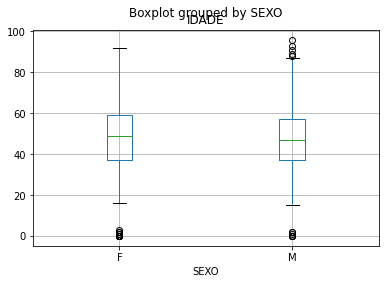

In [6]:
data.boxplot(column='IDADE',by='SEXO')

## Seleção dos dados

Nesta etapa vamos filtrar apenas linhas com os tipos de relamação (assuntos) mais comuns.

- Faça uma contagem dos assuntos mais comuns (usando `groupby`). Revise o procedimento no tutorial de Manipulação e Agregação de Dados, se necessário.
- Crie uma lista contendo os assuntos com mais de 60 reclamações. Armazene a lista em uma variável para uso posterior.

**Dica:** Para criar uma lista a partir de uma coluna de valores, use o comando `list()` como no exemplo: `list(df_grouped_top['ASSUNTO'])`

In [7]:
# Resposta:
topics = dataSujo.groupby(['ASSUNTO']).count()[['SOLICITACAO']]
topics = (topics[topics['SOLICITACAO']>60]).reset_index()
topics_list = list(topics['ASSUNTO'])
topics_list

['ABORDAGEM SOCIAL DE RUA - ADULTO',
 'ANIMAIS',
 'ANIMAIS DOMÉSTICOS',
 'COLETA',
 'DISQUE SOLIDARIEDADE',
 'DRENAGEM',
 'FAUNA SINANTRÓPICA',
 'FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS',
 'ILUMINAÇÃO PÚBLICA',
 'LIMPEZA',
 'MOTORISTAS, COBRADORES E PORTEIROS',
 'OUTROS SETORES SMS',
 'POLUIÇÃO',
 'POSTO DE SAÚDE',
 'SEMÁFORO',
 'TRÂNSITO',
 'UNIDADE DE PRONTO ATENDIMENTO',
 'ÁRVORE']

Crie um novo DataFrame contendo apenas reclamações contidas na lista das reclamações mais comuns.

**Dica:** Para filtrar linhas que contêm valores de uma lista, use o método `isin()`. Por exemplo, `df['ASSUNTO'].isin(lista_top)` retorna uma lista de valores True/False que pode ser usada para selecionar as linhas de interesse.

In [8]:
# Resposta:
dataSujo[dataSujo['ASSUNTO'].isin(topics_list)]

,SOLICITACAO,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,REGIONAL_ASS,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL
0,6669771,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,09/11/2016,21:02:44,ABORDAGEM SOCIAL DE RUA - ADULTO,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,ABORDAGEM SOCIAL DE RUA - ADULTO - PESSOAS/FAM...,"ANDRE DE BARROS, 0",CENTRO,Unidade Regional Matriz,NENHUM,NÃO SOUBE INFORMAR NUMERAÇÃO PREDIAL,M,NaN,NaN,NaN,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,Abordagem realizada. Pessoa foi orientada quan...
1,6718351,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,27/12/2016,00:40:04,ABORDAGEM SOCIAL DE RUA - ADULTO,PERDIDA/DESORIENTADA,ABORDAGEM SOCIAL DE RUA - ADULTO - PERDIDA/DES...,"NILO CAIRO, 0",CENTRO,Unidade Regional Matriz,NENHUM,"NÃO SOUBE INFORMAR NUMERAÇÃO PREDIAL, RELATA E...",M,NaN,NaN,NaN,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
3,6718692,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,27/12/2016,13:28:27,ABORDAGEM SOCIAL DE RUA - ADULTO,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,ABORDAGEM SOCIAL DE RUA - ADULTO - PESSOAS/FAM...,"MARECHAL DEODORO, 0",CENTRO,Unidade Regional Matriz,NENHUM,NaN,M,NaN,NaN,NaN,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,A pessoa da solicitação já foi abordada nesta ...
4,6704503,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,09/12/2016,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,DORMINDO/CAÍDAS NA RUA,ABORDAGEM SOCIAL DE RUA - ADULTO - DORMINDO/CA...,"MARECHAL DEODORO, 0",CENTRO,Unidade Regional Matriz,NENHUM,NÃO SOUBE INFORMAR NUMERAÇÃO PREDIAL.,M,NaN,NaN,04/06/1997,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,A pessoa da solicitação já faz parte da rede d...
5,6672832,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,12/11/2016,02:29:24,ABORDAGEM SOCIAL DE RUA - ADULTO,DORMINDO/CAÍDAS NA RUA,ABORDAGEM SOCIAL DE RUA - ADULTO - DORMINDO/CA...,"XV DE NOVEMBRO, 0",CENTRO,Unidade Regional Matriz,NENHUM,NÃO INFORMOU NUMERAÇÃO PREDIAL.,M,NaN,NaN,29/12/1971,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,A pessoa da solicitação já faz parte da rede d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,6758447,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,27/01/2017,19:24:18,ABORDAGEM SOCIAL DE RUA - ADULTO,PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA,ABORDAGEM SOCIAL DE RUA - ADULTO - PESSOAS/FAM...,"PRESIDENTE AFFONSO CAMARGO, 330",JARDIM BOTANICO,Unidade Regional Matriz,TELEFONE,PRÓXIMO AO PONTO DE REFERÊNCIA.,M,PARQUE SAO JOAO,NaN,11/05/1988,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P..."
7006,6662485,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,04/11/2016,03:26:52,ABORDAGEM SOCIAL DE RUA - ADULTO,PERDIDA/DESORIENTADA,ABORDAGEM SOCIAL DE RUA - ADULTO - PERDIDA/DES...,"PRESIDENTE AFFONSO CAMARGO, 330",JARDIM BOTANICO,Unidade Regional Matriz,NENHUM,NaN,M,CONJUNTO RESIDENCIAL CIDADE ALTA,NaN,19/01/1983,CIDADÃO,FUNDAÇÃO DE AÇÃO SOCIAL,01 - Abordagem realizada sendo o homem encamin...
7008,6690744,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,28/11/2016,13:04:25,DRENAGEM,LIMPEZA E DESOBSTRUÇÃO DE CAIXA DE CAPTAÇÃO,DRENAGEM - LIMPEZA E DESOBSTRUÇÃO DE CAIXA DE ...,"DEPUTADO HEITOR ALENCAR FURTADO, 4000",CIDADE INDUSTRIAL,Unidade Regional CIC,TELEFONE,CIDADÃO INFORMA QUE ESTA DO LADO DO TERMINAL S...,M,FERRARIA,NaN,14/04/1968,CIDADÃO,SECRETARIA DO GOVERNO MUNICIPAL,SEM POSSIBILIDADE DE ATENDIMENTO FACE SUSPENSÃ...
7009,6716157,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,22/12/2016,10:11:15,TRÂNSITO,VEÍCULO ESTACIONADO - ESQUINA,TRÂNSITO - VEÍCULO ESTACIONADO - ESQUINA,"SAO PAULO DA CRUZ, 50",JUVEVE,Unidade Regional Matriz,NENHUM,NÃO SOUBE INFORMAR TODOS OS DADOS IMPORTANTES.,M,JARDIM GUAIRACA,NaN,18/05/1989,CIDADÃO,SECRETARIA MUNICIPAL DE TRÂNSITO,"Informamos que encaminhamos a viatura 430, às ..."


## Análise de similaridades entre reclamações de bairros

Queremos agora identificar bairros com problemas similares. Use o método `crosstab()` para gerar um novo DataFrame com os bairros nas colunas e os assuntos (os mais comuns, filtrados acima) nas linhas. 

In [9]:
# Resposta:
dataCross = pd.crosstab(dataSujo['ASSUNTO'],data['BAIRRO_ASS'])
dataCross

BAIRRO_ASS,abranches,agua verde,ahu,alto boqueirao,alto da gloria,alto da rua xv,atuba,augusta,bacacheri,bairro alto,...,sitio cercado,taboao,taruma,tatuquara,tingui,uberaba,umbara,vila izabel,vista alegre,xaxim
ASSUNTO,,,,,,,,,,,,,,,,,,,,,
ABORDAGEM SOCIAL DE RUA - ADULTO,4,23,1,6,6,9,3,0,7,7,...,6,2,1,4,2,3,1,0,2,5
ABORDAGEM SOCIAL DE RUA - CRIANÇA,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
AFORAMENTO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ANIMAIS,1,2,2,5,1,1,0,1,3,3,...,3,0,2,6,0,4,1,0,0,5
ANIMAIS DOMÉSTICOS,1,1,0,3,1,0,0,1,0,2,...,6,0,2,2,0,5,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIGILÂNCIA EM SAÚDE AMBIENTAL,0,0,0,0,0,0,1,0,0,1,...,2,0,0,0,0,0,0,0,3,1
VIGILÂNCIA SANITÁRIA DE PRODUTOS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VIGILÂNCIA SANITÁRIA EM ESTABELECIMENTOS,0,2,0,1,0,0,0,0,1,1,...,2,0,0,0,0,0,0,1,0,0


Usando o DataFrame obtido anteriormente, gere a matriz de correlações entre bairros (método `corr()`).

In [10]:
# Resposta:
dataCross = dataCross.corr()
dataCross

BAIRRO_ASS,abranches,agua verde,ahu,alto boqueirao,alto da gloria,alto da rua xv,atuba,augusta,bacacheri,bairro alto,...,sitio cercado,taboao,taruma,tatuquara,tingui,uberaba,umbara,vila izabel,vista alegre,xaxim
BAIRRO_ASS,,,,,,,,,,,,,,,,,,,,,
abranches,1.000000,0.915370,0.914920,0.938481,0.943581,0.856756,0.902672,0.816461,0.938025,0.899356,...,0.926599,0.717561,0.899160,0.844511,0.830974,0.934366,0.803144,0.781710,0.862758,0.928428
agua verde,0.915370,1.000000,0.865810,0.907173,0.928192,0.845070,0.849118,0.820673,0.913321,0.808650,...,0.861429,0.677599,0.787341,0.898753,0.806836,0.858328,0.753633,0.823960,0.785711,0.884291
ahu,0.914920,0.865810,1.000000,0.905423,0.867655,0.849238,0.828095,0.795518,0.951947,0.816376,...,0.863228,0.549628,0.844564,0.846154,0.880125,0.885197,0.761123,0.897909,0.773611,0.903701
alto boqueirao,0.938481,0.907173,0.905423,1.000000,0.943749,0.851128,0.923483,0.884922,0.947203,0.943552,...,0.963472,0.704047,0.928195,0.900937,0.838426,0.968902,0.890245,0.841436,0.908459,0.975527
alto da gloria,0.943581,0.928192,0.867655,0.943749,1.000000,0.829813,0.909545,0.828612,0.926315,0.897931,...,0.927250,0.739050,0.894098,0.872557,0.775770,0.925074,0.847959,0.782905,0.858308,0.934431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uberaba,0.934366,0.858328,0.885197,0.968902,0.925074,0.827961,0.923758,0.865580,0.928523,0.977159,...,0.973794,0.701801,0.965549,0.843424,0.806558,1.000000,0.910575,0.799104,0.895784,0.970830
umbara,0.803144,0.753633,0.761123,0.890245,0.847959,0.782361,0.860468,0.742614,0.826039,0.945197,...,0.907179,0.681760,0.932787,0.746816,0.677197,0.910575,1.000000,0.724315,0.826021,0.908180
vila izabel,0.781710,0.823960,0.897909,0.841436,0.782905,0.776842,0.743553,0.801770,0.912825,0.720714,...,0.777988,0.405533,0.749038,0.864255,0.869503,0.799104,0.724315,1.000000,0.692093,0.850459


Use um Heatmap para exibir as correlações com cores.

In [11]:
# Resposta:
dataCross = dataCross.style.background_gradient(cmap='RdBu')
dataCross

É possível perceber algum padrão entre os bairros baseando-se nas correlações obtidas?

## Análise de bairros mais problemáticos

Agora nosso interesse é determinar os bairros com mais reclamações.

- Crie um DataFrame com a contagem de reclamações por bairro (usando a coluna BAIRRO_ASS).
- Exiba os dados usando um gráfico de barras para visualizarmos os bairros com mais reclamações

In [16]:
# Resposta:
droupedDataSujo = dataSujo.groupby(['BAIRRO_ASS']).count()
droupedDataSujo

,SOLICITACAO,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,REGIONAL_ASS,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL
BAIRRO_ASS,,,,,,,,,,,,,,,,,,,
ABRANCHES,53,53,53,53,53,53,53,53,53,53,53,30,53,52,52,53,53,53,53
AGUA VERDE,205,205,205,205,205,205,205,205,205,205,205,127,205,204,199,202,205,205,204
AHU,52,52,52,52,52,52,52,52,52,52,52,27,52,52,51,51,52,52,52
ALTO BOQUEIRAO,157,157,157,157,157,157,157,157,157,157,157,87,157,156,154,155,157,157,155
ALTO DA GLORIA,88,88,88,88,88,88,88,88,88,88,88,42,88,87,82,87,88,88,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBERABA,197,197,197,197,197,197,197,197,197,197,197,117,197,196,195,194,197,197,197
UMBARA,49,49,49,49,49,49,49,49,49,49,49,33,49,48,47,47,49,49,49
VILA IZABEL,33,33,33,33,33,33,33,33,33,33,33,20,33,33,33,33,33,33,33


<AxesSubplot:xlabel='BAIRRO_ASS'>

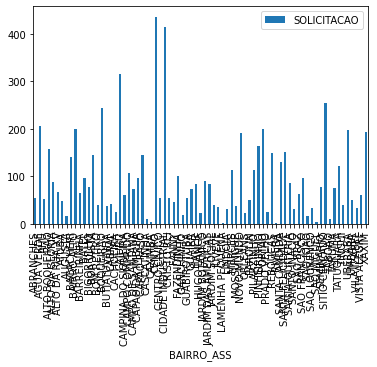

In [32]:
# Resposta:
droupedDataSujo.reset_index()
droupedDataSujo[['SOLICITACAO']].plot.bar()

O problema de considerar apenas o total de reclamações é que não estamos considerando a população dos bairros. Então o ideal é calcular a *taxa* de reclamações, ou seja, o número de reclamações por habitante do bairro.

- Crie um novo DataFrame a partir dos dados do arquivo `../data/dados_bairros.csv`.
- Converta os nomes dos bairros deste DataFrame para caixa-baixo (minúsculo).
- Faça uma junção do DataFrame de totais por bairro com o novo DataFrame.

**Dica:** Para especificar as colunas contendo os valores base para a junção, especifique os parâmetros `left_on` e `right_on` no método `merge`.

In [42]:
# Resposta:
newdata = pd.read_csv('../data/dados_bairros.csv')
newdata['Bairro'] = newdata['Bairro'].str.lower()
newdata.head()

,Bairro,AreaKm2,Homens,Mulheres,Total,Domicilios,RendimentoDom
0,alto boqueiao,"12,11",24824,26331,51155,14301,"1110,63"
1,lamenha pequena,"3,4",353,348,701,188,"665,99"
2,xaxim,"8,92",26747,27944,54691,15482,"1211,6"
3,riviera,"2,36",100,103,203,62,"423,13"
4,sao miguel,7,2512,2399,4911,1247,"409,43"


Crie uma nova coluna chamada *taxa* contendo o resultado da divisão da coluna de contagem de reclamações pela coluna de total de habitantes.

In [ ]:
# Resposta:

Exiba um gráfico de barras mostrando os bairros de acordo com a taxa de reclamações.

In [ ]:
# Resposta:

## Analisando tendências temporais

Vamos agora identificar os meses com mais reclamações. 

- Usando o DataFrame completo (lido a partir do CSV), converta a coluna *DATA* para o tipo `datetime`. Revise o tutorial de Limpeza de Dados se necessário.
- Agrupe as linhas contando as reclamações por mês. Revise o tutorial de Análise Exploratória se necessário.
- Exiba um gráfico de linha com a evolução da contagem.


<AxesSubplot:xlabel='DATA'>

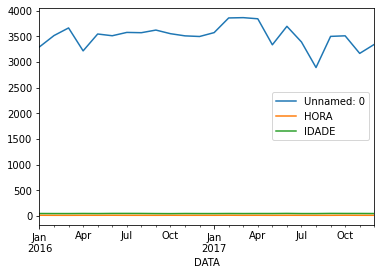

In [56]:
# Resposta:
data["DATA"] = pd.to_datetime(data["DATA"])
periodo = data.DATA.dt.to_period("M") #DATA = nome da tabela
data.groupby(periodo).mean().plot()

In [ ]:
# Resposta: